<h1 align="center"> Challenge 4 & 5 Solution </h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# Loading zip file and asking pandas to infer datetime format
df = pd.read_csv("201402-citibike-tripdata.zip",
                 compression='zip', infer_datetime_format=True,
                 parse_dates=['starttime', 'stoptime'])

# Average time in Timedelta format
average_time = (df['stoptime'] - df['starttime']).mean()

# gender based counts
gender_counts = df['gender'].value_counts()

# usertype based counts
usertype_counts = df['usertype'].value_counts()

# usage by gender for a month over 24 hours
citibike_usage = df.groupby([df['starttime'].dt.hour])['gender'].value_counts().unstack()


In [2]:
citibike_usage

gender,0,1,2
starttime,,,
0,29,1764,328
1,27,986,168
2,25,685,83
3,17,393,40
4,12,388,62
5,6,995,201
6,14,3666,524
7,58,7326,1321
8,114,13400,3031


In [3]:
usertype_counts

Subscriber    218019
Customer        6717
Name: usertype, dtype: int64

In [4]:
type(df.head()['starttime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
citibike_usage

gender,0,1,2
starttime,,,
0,29,1764,328
1,27,986,168
2,25,685,83
3,17,393,40
4,12,388,62
5,6,995,201
6,14,3666,524
7,58,7326,1321
8,114,13400,3031


In [6]:
# gender by hour
men = citibike_usage[1]
women = citibike_usage[2]
unknown = citibike_usage[0]

In [7]:
gender_counts.index

Int64Index([1, 2, 0], dtype='int64')

In [8]:
import matplotlib.gridspec as gridspec
import numpy as np

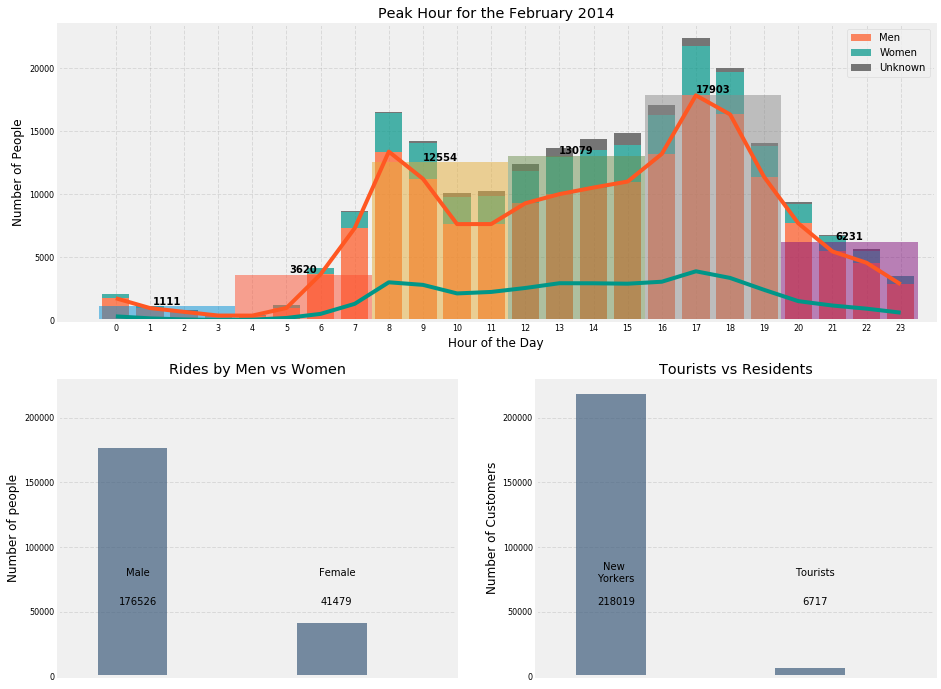

In [9]:
fig = plt.figure(figsize=(14, 12))
fig.canvas.set_window_title("Citibike Challenge")
gs = gridspec.GridSpec(2, 2)

# Use the top row and all columns
ax = fig.add_subplot(gs[0,:])

# Bar plot for men, women and unknown
rect1 = ax.bar(men.index, men, 
    color='#FF5722',edgecolor=None, alpha=0.7)
rect2 = ax.bar(women.index, women, 
    color='#009688',edgecolor=None, alpha=0.7, bottom=men)
rect3 = ax.bar(unknown.index, unknown, 
    color='#757575',edgecolor=None, alpha=1, bottom=men+women)

known = men + women

# Line plot for men and women
#ax.plot(men.index, men, color='#ff0000', label='Men')
#ax.plot(women.index, women, color='#ffA500', label='Women')

ax.plot(men.index, men, color='#FF5722', label='Men')
ax.plot(women.index, women, color='#009688', label='Women')

# Get average number of men and women over a period of 4 hours
for i in range(0, len(men), 4):
    avg = np.average(known[i:i+4])
    ap = ax.bar(i-0.5, avg, width=4, 
                alpha=0.5, align='edge')
    ax.text(ap[0].get_x()+ap[0].get_width()/2., 
            ap[0].get_height(), '{}'.format(int(avg)),              
            ha='center', va='bottom', 
            weight='bold')       

ax.legend( (rect1, rect2, rect3), ('Men', 'Women', 'Unknown') )

ax.set_xlabel('Hour of the Day')
ax.set_xticks(np.arange(men.shape[0]))
ax.set_xlim(right = men.shape[0])
ax.grid(color='grey', linestyle='--', linewidth=1, alpha=0.2)
ax.set_ylabel('Number of People')
ax.set_title('Peak Hour for the February 2014')
ax.tick_params(labelsize=8)



# Gender bar plot
# Use bottom row 1st col for gender plot
bx = fig.add_subplot(gs[1,0])                                                       
rect = bx.bar(np.arange(2)+0.2, (gender_counts[1],gender_counts[2]), 
               width=0.35, color='#3F5D7D', align='edge',                     
               edgecolor=None, alpha=0.7)

x_g = rect[0].get_x() #0.22
y_g = rect[0].get_width() #0.5

bx.text(x_g, y_g, 'Male', horizontalalignment='center',                         
        verticalalignment='center',                           
        weight='ultralight', rotation='horizontal', transform=bx.transAxes)     
bx.text(x_g, y_g-0.1, np.sum(gender_counts[1]), horizontalalignment='center',               
        verticalalignment='center',                          
        weight='ultralight', rotation='horizontal', transform=bx.transAxes)     
                                                                               
bx.text(x_g+0.5, y_g, 'Female', horizontalalignment='center',                   
        verticalalignment='center',                            
        weight='ultralight', rotation='horizontal', transform=bx.transAxes)     
bx.text(x_g+0.5, y_g-0.1, np.sum(gender_counts[2]), horizontalalignment='center',           
        verticalalignment='center',                           
        weight='ultralight', rotation='horizontal', transform=bx.transAxes)  

bx.set_xlabel('Gender')
bx.set_ylabel('Number of people')
bx.set_title('Rides by Men vs Women')
bx.grid(color='grey', linestyle='--', linewidth=1, alpha=0.2)                   
bx.set_xlim([0, 2])
bx.set_ylim(top = 1.02 * df.shape[0])
bx.axes.get_xaxis().set_visible(False) 
bx.tick_params(labelsize=8)


# For tourists
cx = fig.add_subplot(gs[1,1])                                                                                                                                            
rect = cx.bar(np.arange(2)+0.2, usertype_counts, 
              width=0.35, color='#3F5D7D',                                                                                                        
               edgecolor=None, alpha=0.7, align='edge')                                                                                                                            

x_t = rect[0].get_x() #0.22
y_t = rect[0].get_width() #0.5

cx.text(x_t, y_t, 'New \nYorkers', horizontalalignment='center',                                                                                                     
        verticalalignment='center',                                                                                                                 
        weight='ultralight', rotation='horizontal', transform=cx.transAxes)                                                                                          
cx.text(x_t, y_t-0.1, usertype_counts[0], horizontalalignment='center',                                                                                                        
        verticalalignment='center',                                                                                                                
        weight='ultralight', rotation='horizontal', transform=cx.transAxes)                                                                                          
                                                                                                                                                                     
cx.text(x_t+0.5, y_t, 'Tourists', horizontalalignment='center',                                                                                                      
        verticalalignment='center',                                                                                                                
        weight='ultralight', rotation='horizontal', transform=cx.transAxes)                                                                                          
cx.text(x_t+0.5, y_t-0.1, usertype_counts[1], horizontalalignment='center',                                                                                                    
        verticalalignment='center',                                                                                                                
        weight='ultralight', rotation='horizontal', transform=cx.transAxes)

cx.set_xlabel('Types of Customers')                                                                                                                                  
cx.set_ylabel('Number of Customers')                                                                                                                                 
cx.set_title('Tourists vs Residents')                                                                                                                                
cx.grid(color='grey', linestyle='--', linewidth=1, alpha=0.2)                                                                                                        
cx.set_xlim([0, 2])                                                                                                                                                  
cx.set_ylim(top = 1.02 * df.shape[0])                                                                                                                                 
cx.axes.get_xaxis().set_visible(False) 
cx.tick_params(labelsize=8)
